In [1]:
# Import the os module
import os
import sys
path = '/home/nicolas/rsast_mf/rsast_mf'

try:
    os.chdir(path)
    print("Current working directory: {0}".format(os.getcwd()))
except FileNotFoundError:
    print("Directory: {0} does not exist".format(path))
except NotADirectoryError:
    print("{0} is not a directory".format(path))
except PermissionError:
    print("You do not have permissions to change to {0}".format(path))

sys.path.append(r'C:\Users\Surface pro\random_sast\sast')

Current working directory: /home/nicolas/rsast_mf/rsast_mf


In [21]:
from utils_sast import znormalize_array, load_dataset, format_dataset, plot_most_important_features, plot_most_important_feature_on_ts
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import pandas as pd


In [25]:
#path="C:\Users\Surface pro\random_sast\sast\data"
ds='HandOutlines' # Chosing a dataset from # Number of classes to consider

rtype="numpy2D"
ds_train_lds , ds_test_lds = load_dataset(ds_folder=path+'/data',ds_name=ds,shuffle=False)
X_test_lds, y_test_lds = format_dataset(ds_test_lds)
X_train_lds, y_train_lds = format_dataset(ds_train_lds)
X_train_lds=np.nan_to_num(X_train_lds)
y_train_lds=np.nan_to_num(y_train_lds)
X_test_lds=np.nan_to_num(X_test_lds)
y_test_lds=np.nan_to_num(y_test_lds)
classes=pd.unique(y_train_lds)
classes

array([1, 0])

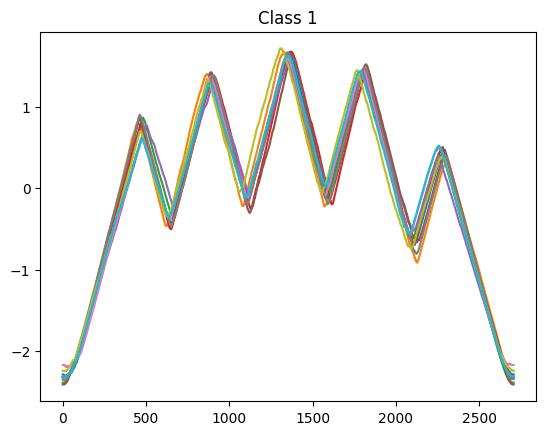

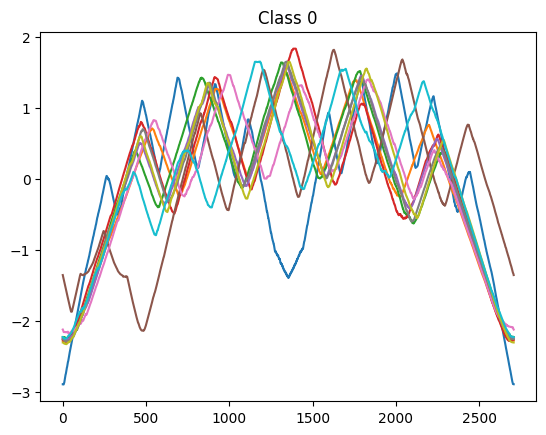

In [31]:
for c in classes:

    X_train_lds_c = X_train_lds[y_train_lds == c][0:10]

    fig, ax = plt.subplots()
    for ts in X_train_lds_c:
        ax.plot(ts)

    ax.set(title='Class '+str(c))


    #fig.savefig("test.png")
    plt.show()

In [8]:
acf_val, acf_confint = acf(X_train_lds_c[0], nlags=len(X_train_lds_c[0])-1,  alpha=.05)

In [9]:
acf_confint

array([[ 1.        ,  1.        ],
       [ 0.96023957,  1.0355532 ],
       [ 0.93060924,  1.06087339],
       ...,
       [-0.70465207,  0.7171238 ],
       [-0.70673141,  0.71504461],
       [-0.70881071,  0.71296538]])

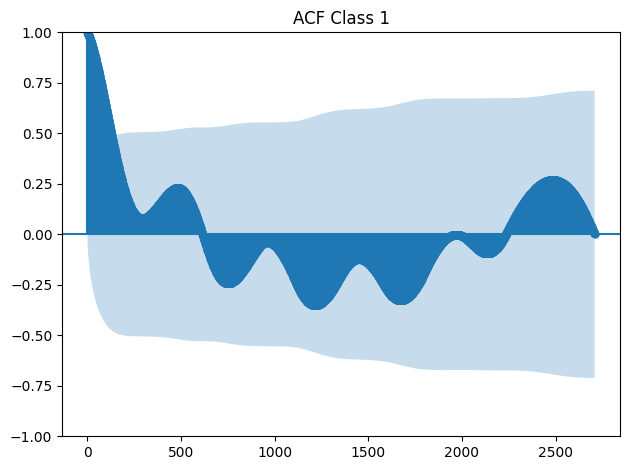

In [10]:
plot_acf(X_train_lds_c[0], lags=len(X_train_lds_c[0])-1,  alpha=.05, title='ACF Class ...')
plt.tight_layout()
plt.show()

In [12]:
pacf_val, pacf_confint = pacf(X_train_lds_c[0], method="ols", nlags=50,  alpha=.05)

In [13]:
pacf_confint

array([[ 1.        ,  1.        ],
       [ 0.96231685,  1.03763048],
       [-0.98016622, -0.90485258],
       [-0.16248647, -0.08717284],
       [-0.42058411, -0.34527048],
       [-0.16311553, -0.0878019 ],
       [-0.23565852, -0.16034489],
       [-0.15291707, -0.07760344],
       [-0.17373735, -0.09842372],
       [-0.10413573, -0.0288221 ],
       [-0.08533924, -0.01002561],
       [-0.07811768, -0.00280405],
       [ 0.06444771,  0.13976134],
       [-0.07762708, -0.00231345],
       [ 0.03654905,  0.11186268],
       [-0.01896375,  0.05634988],
       [-0.0012463 ,  0.07406733],
       [-0.02851556,  0.04679807],
       [-0.00669804,  0.06861559],
       [-0.03014964,  0.04516399],
       [-0.03171332,  0.04360031],
       [-0.06529059,  0.01002304],
       [-0.0393819 ,  0.03593173],
       [-0.05112745,  0.02418618],
       [-0.0203739 ,  0.05493973],
       [-0.03315697,  0.04215666],
       [-0.03762411,  0.03768952],
       [-0.03732758,  0.03798605],
       [-0.06262635,

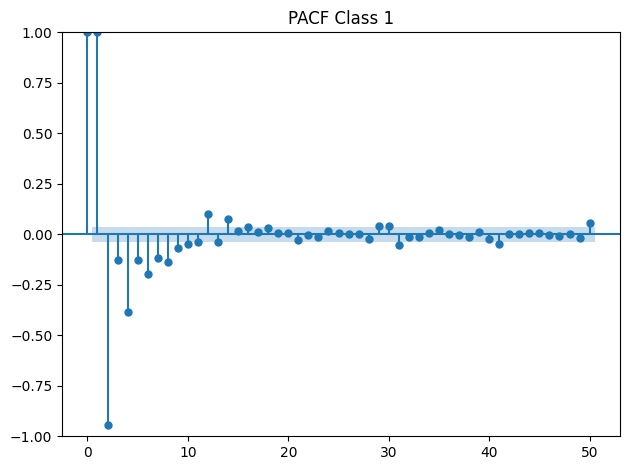

In [15]:
plot_pacf(X_train_lds_c[0], lags=50,  alpha=.05, title='PACF Class 1', method="ols")
plt.tight_layout()
plt.show()